# Example: Athletes Dataset

# 1. Import libraries and the dataset

In [ ]:
import pandas as pd

In [5]:
athletesDataset=pd.read_csv("../../datasets/athlete_events.csv")
athletesDataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# Auxiliar functions

def removeNullValues(dataset,column):
    """Removes the null values from a column of the dataset"""

    try:
        dataset=dataset.dropna(subset=[column])
    
    except KeyError as key:
        print(f"The column {column} doesn't exist in the dataset.")
    
    except NameError as ne:
        print(f"The dataset {dataset} doesn't exist.")

    except Exception as ex:
        print(ex)
    
    else:
        return dataset


def printRemotionNullValues(dataset,column):
    print(dataset[column].isnull().sum())
    dataset=removeNullValues(dataset,column)
    print(dataset[column].isnull().sum())
    return dataset



def removeOutliers(dataset,column):
    """Removes the outliers from a column of the dataset.
    
    Returns the dataset without outliers in the column
    """
    try:
        q1,q3 = np.percentile(dataset[column], [25,75])
        print(f" Q1 and Q3 = {q1} : {q3}" )
        
        iqr= q3 - q1
        lower = q1-1.5*iqr
        upper = q3+1.5*iqr
        print(f"Lower and upper = {lower} : {upper}")

        cleanDataset=dataset[ (dataset[column] >= lower) & (dataset[column]<=upper)]

    except KeyError as key:
        print(key)
    
    except NameError as ne:
        print(ne)
    except Exception as ex:
        print(ex)

    else:
        return cleanDataset


#removeOutliers(athletesDataset,"Weight")

#athletesDataset
    

## 2. Inspect data Structure and check missing values

In [3]:
athletesDataset.info()
print("\n",athletesDataset.isnull().sum())

NameError: name 'athletesDataset' is not defined

### Remover valores nulos em cada coluna

In [8]:
# Column Age
print(athletesDataset["Age"].isnull().sum())
athletesDataset=removeNullValues(athletesDataset,"Age")
print(athletesDataset["Age"].isnull().sum())


9474
0


In [9]:
#Column Height
print(athletesDataset["Height"].isnull().sum())
athletesDataset=removeNullValues(athletesDataset,"Height")
print(athletesDataset["Height"].isnull().sum())

51574
0


In [10]:
#Column Weight
print(athletesDataset["Weight"].isnull().sum())
athletesDataset=removeNullValues(athletesDataset,"Weight")
print(athletesDataset["Weight"].isnull().sum())

3903
0


In [11]:
#Column Year
print(athletesDataset["Year"].isnull().sum())
athletesDataset=removeNullValues(athletesDataset,"Year")
print(athletesDataset["Year"].isnull().sum())

0
0


# 3. Statistical summary and visualizing outliers for the columns age, weight, height and year

In [ ]:
athletesDataset.describe()

,ID,Age,Height,Weight,Year
count,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000
mean,68616.017675,25.055509,175.371950,70.688337,1989.674678
std,38996.514355,5.483096,10.546088,14.340338,20.130865
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,35194.000000,21.000000,168.000000,60.000000,1976.000000
50%,68629.000000,24.000000,175.000000,70.000000,1992.000000
75%,102313.000000,28.000000,183.000000,79.000000,2006.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


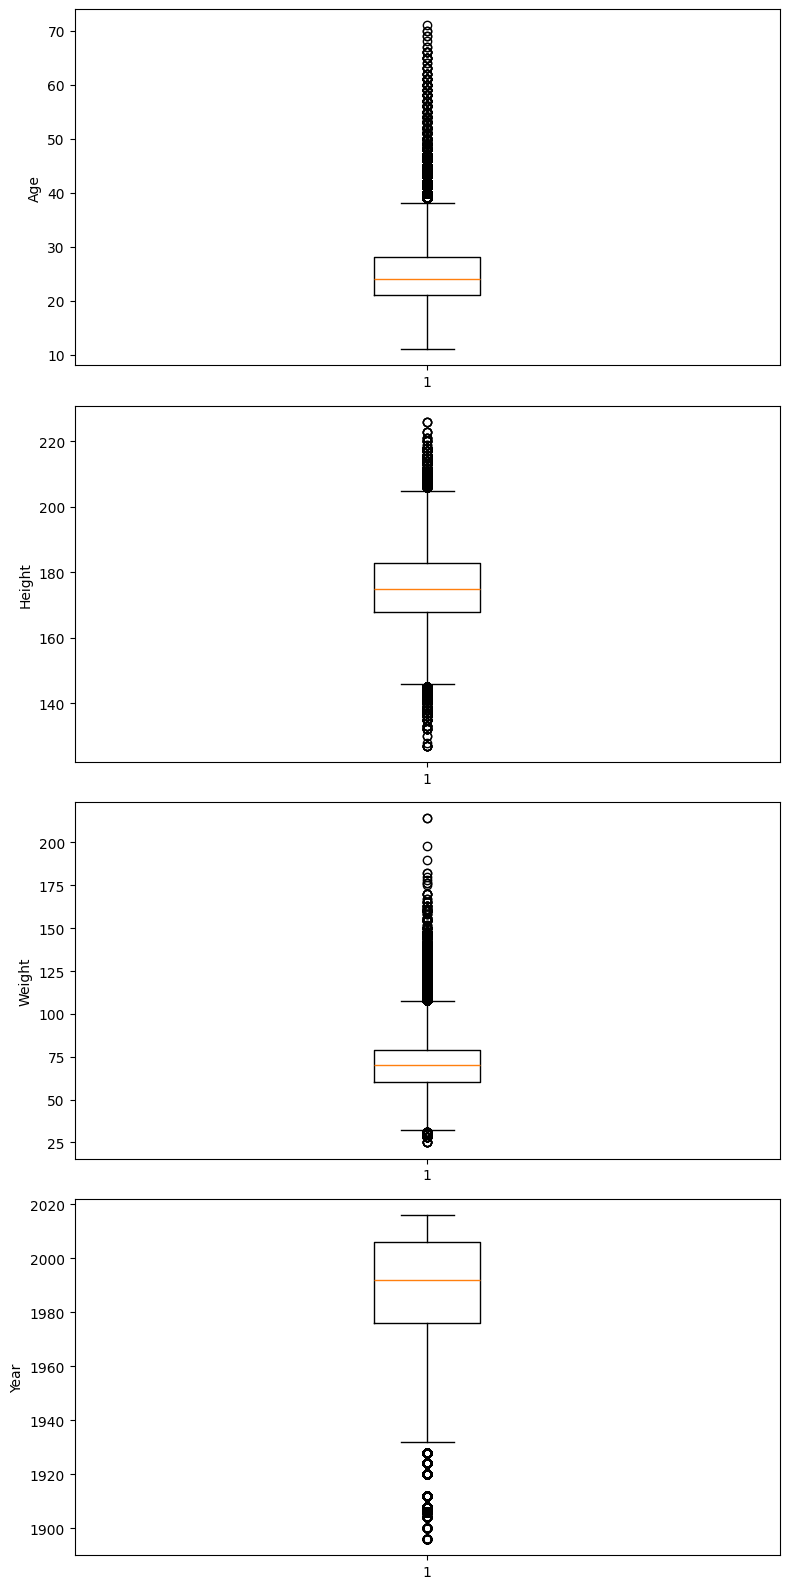

In [13]:
fig, subBoxes=plt.subplots(4,1,figsize=(8,16), dpi=100)
columns=["Age","Height","Weight", "Year"]

for column in columns:
    i=columns.index(column)
    subBoxes[i].boxplot(athletesDataset[column])
    subBoxes[i].set_ylabel(column)
    
plt.tight_layout()
plt.show()


## 4. Remove Outliers using the Interquartile Range (IQR) Method

Remove Extreme values beyonde a reasonable range to improve model robustness.

IQR = Q3 (75th percentile) - Q1 (25th percentile)

lower (Min) = Q1 - 1.5 * IQR

upper (Max) = Q3 + 1.5 * IQR

Values below lower or above upper are outliers;
Calculate lower and upper bounds for each column separately;
Filter data points to keep onlythose withn bounds

In [14]:
import numpy as np

 Q1 and Q3 = 21.0 : 28.0
Lower and upper = 10.5 : 38.5


{'whiskers': [<matplotlib.lines.Line2D at 0x20b4dead590>,
 'caps': [<matplotlib.lines.Line2D at 0x20b4dead810>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b4dead450>],
 'medians': [<matplotlib.lines.Line2D at 0x20b4deada90>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b4deadbd0>],
 'means': []}

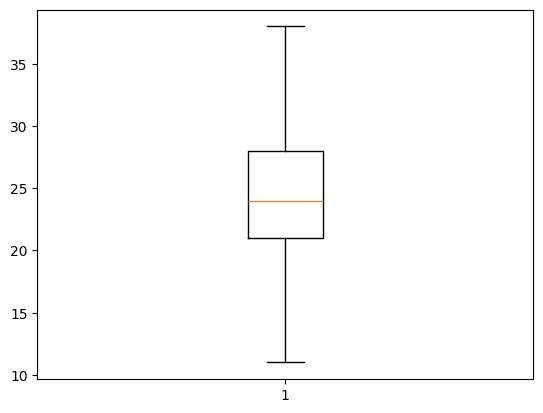

In [ ]:
# Column Age
athletesDataset=removeOutliers(athletesDataset,"Age")
plt.boxplot(athletesDataset["Age"])

 Q1 and Q3 = 168.0 : 183.0
Lower and upper = 145.5 : 205.5


{'whiskers': [<matplotlib.lines.Line2D at 0x20b4df4b4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20b4df4b750>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b4df4b390>],
 'medians': [<matplotlib.lines.Line2D at 0x20b4df4b9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b4df4bb10>],
 'means': []}

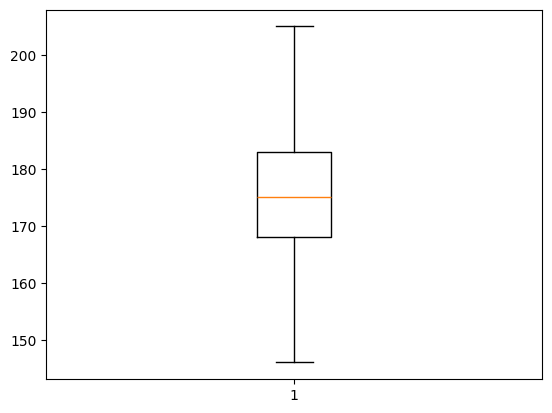

In [27]:
# Column Height
athletesDataset=removeOuliers(athletesDataset,"Height")
plt.boxplot(athletesDataset["Height"])

 Q1 and Q3 = 60.0 : 78.0
Lower and upper = 33.0 : 105.0


{'whiskers': [<matplotlib.lines.Line2D at 0x20b4e016d50>,
 'caps': [<matplotlib.lines.Line2D at 0x20b4e016fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b4e016c10>],
 'medians': [<matplotlib.lines.Line2D at 0x20b4e017250>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b4e017390>],
 'means': []}

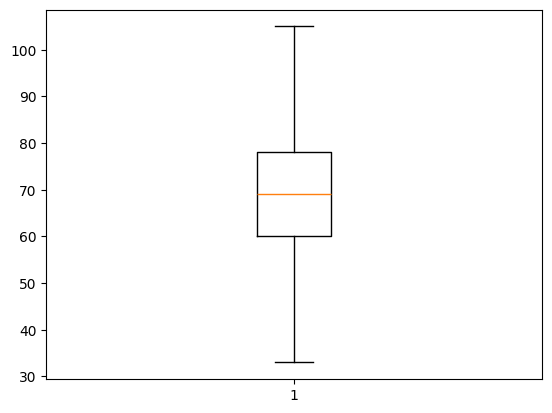

In [29]:
# Column Weight
athletesDataset=removeOuliers(athletesDataset,"Weight")
plt.boxplot(athletesDataset["Weight"])

 Q1 and Q3 = 1976.0 : 2006.0
Lower and upper = 1931.0 : 2051.0


{'whiskers': [<matplotlib.lines.Line2D at 0x20b507b6d50>,
 'caps': [<matplotlib.lines.Line2D at 0x20b507b6fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b507b6c10>],
 'medians': [<matplotlib.lines.Line2D at 0x20b507b7250>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b507b7390>],
 'means': []}

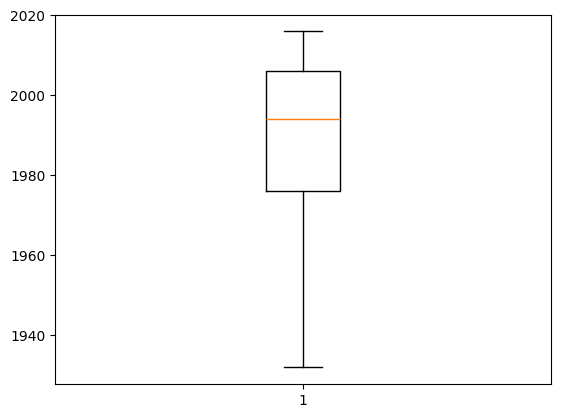

In [30]:
# Column Year
athletesDataset=removeOuliers(athletesDataset,"Year")
plt.boxplot(athletesDataset["Year"])

## 5. Correlation Analysis

Undertand relationship between features and target variable (outcome).

Correlation helps gauge (medir) feature importance.

**df.corr()**: Computes pairwise correlation coefficients between columns.

Heatmap via seaborn visualizes correlation matrix clearly.

Sorting correlations with corr['Outcome'].sort_values() highlights features most correlated with the target.

In [33]:
import seaborn as sns

In [34]:
correlation= athletesDataset.corr()
plt.figure(dpi=130)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

print(correlation["Outcome"].sort_values(ascending=False))

ValueError: could not convert string to float: 'A Dijiang'